In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:

mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

In [3]:
mnist_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train.tail(30)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41970,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41971,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41972,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41973,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41974,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41975,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41976,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41977,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41978,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41979,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


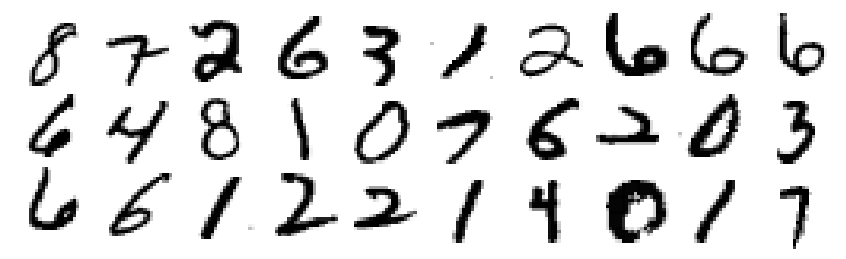

In [5]:
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [6]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


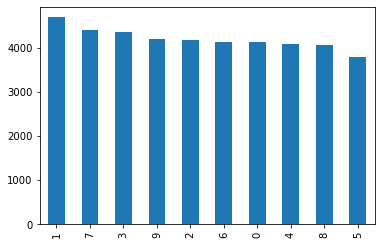

In [8]:
data_check = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

In [9]:
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [10]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [11]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


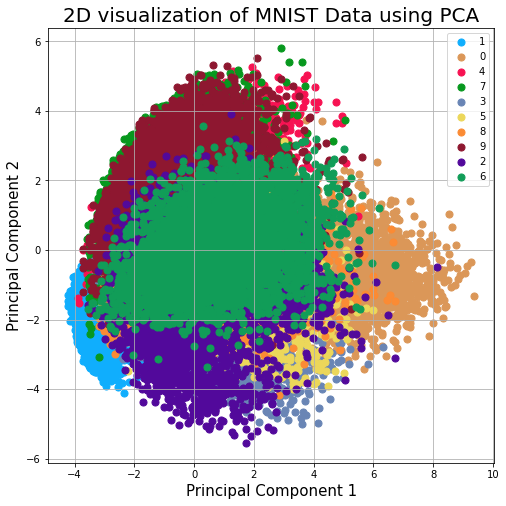

In [12]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()

In [13]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)


(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


In [14]:
#KNN
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [15]:
def predictClassifier(X_test, classifier):
    y_pred = classifier.predict(X_test)
    return y_pred

In [16]:
def calculateAccuracy(y_pred, y_test):#Function to check accuracy of the model. Takes input arguments as actual and predicted valuesand returns accuracy score
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [17]:
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)

100%|██████████| 9/9 [15:10<00:00, 101.15s/it]


In [18]:

AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9552380952380952,
 0.9517460317460318,
 0.9480952380952381,
 0.9457142857142857,
 0.9442857142857143]

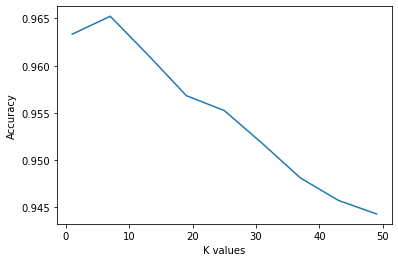

In [19]:
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [21]:
%%time
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.9407619047619048
Wall time: 2min 56s


################# Confusion Matrix ####################


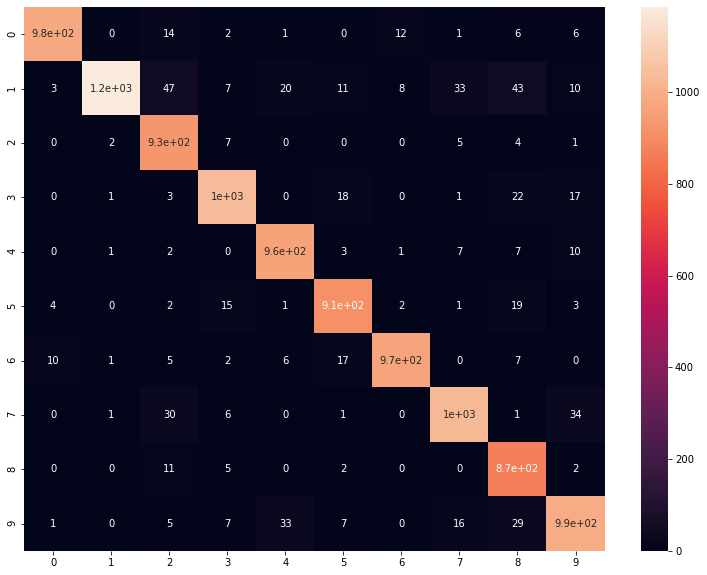

In [22]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);

In [23]:
#Decision Tree
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)

100%|██████████| 11/11 [01:16<00:00,  6.96s/it]


In [25]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.9556746031746032, 0.9852380952380952, 0.9958333333333333, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7398412698412699, 0.8134920634920635, 0.844920634920635, 0.8509523809523809, 0.8525396825396825, 0.8503174603174604, 0.846984126984127, 0.8442857142857143, 0.8457142857142858, 0.8473015873015873]


In [27]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

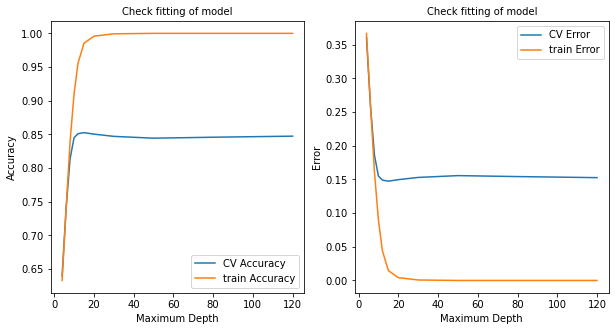

In [28]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [30]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

Final Accuracy DT:  0.8456190476190476


In [32]:
#Random Forest
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
ypredict = rf.predict(X_test)
print("Final Accuracy Random Forest: ",accuracy_score(y_test,ypredict))


Final Accuracy Random Forest:  0.9611428571428572


In [33]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Final Accuracy Logistic Regression: ",accuracy_score(y_test,predictions))

Final Accuracy Logistic Regression:  0.915047619047619


C:\Users\sohail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#XG Boost
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Final Accuracy XG",accuracy_score(y_test,y_pred))